<a href="https://colab.research.google.com/github/jhsam007/Netflix-Stock-Price-prediction-Using-Fcabook-Prophet/blob/main/Netflix_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [40]:
#Initialize Plotly
import plotly.io as pio
pio.renderers.default='colab'

In [41]:
#importing dataset
df= pd.read_csv("NFLX.csv")

In [42]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,540.299988,540.650024,532.919983,537.309998,537.309998,1780700
1,2021-07-13,535.760010,545.330017,535.760010,540.679993,540.679993,2751600
2,2021-07-14,541.010010,554.099976,541.010010,547.950012,547.950012,4659500
3,2021-07-15,553.969971,557.539978,538.200012,542.950012,542.950012,5713900
4,2021-07-16,541.809998,544.059998,527.049988,530.309998,530.309998,3442100
...,...,...,...,...,...,...,...
246,2022-07-01,176.490005,180.100006,174.270004,179.949997,179.949997,5194700
247,2022-07-05,176.279999,185.919998,172.679993,185.880005,185.880005,7334300
248,2022-07-06,185.199997,186.220001,180.820007,184.059998,184.059998,5753400
249,2022-07-07,184.270004,190.210007,183.500000,189.270004,189.270004,6334500


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [44]:
px.area(df, x="Date", y="Close")

In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,452.434939,458.941154,444.665657,451.724302,451.724302,7.215738e+06
std,170.376628,171.132847,169.580974,170.211698,170.211698,1.055700e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,350.475006,359.134995,341.705002,348.304993,348.304993,2.870250e+06
50%,515.239990,520.789978,510.369995,515.409973,515.409973,4.644200e+06
75%,599.309998,609.665008,593.764984,600.595001,600.595001,7.764000e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [46]:
px.line(df, x="Date", y="Close")

In [47]:
px.area(df, x="Date", y="Volume")

In [48]:
px.bar(df, y="Volume")

In [49]:
px.box(df,y="Close")

Data Preparation

In [50]:
columns=["Date", "Close"]
ndf= pd.DataFrame(df, columns=columns)

In [51]:
ndf

,Date,Close
0,2021-07-12,537.309998
1,2021-07-13,540.679993
2,2021-07-14,547.950012
3,2021-07-15,542.950012
4,2021-07-16,530.309998
...,...,...
246,2022-07-01,179.949997
247,2022-07-05,185.880005
248,2022-07-06,184.059998
249,2022-07-07,189.270004


In [52]:
prophet_df= ndf.rename(columns={"Date":"ds", "Close":"y"})

In [53]:
#Creating Model
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting

In [54]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-12,508.670471,456.219065,544.141561,508.670471,508.670471,-5.188597,-5.188597,-5.188597,-5.188597,-5.188597,-5.188597,0.0,0.0,0.0,503.481874
1,2021-07-13,510.037692,461.402460,549.967041,510.037692,510.037692,-3.157250,-3.157250,-3.157250,-3.157250,-3.157250,-3.157250,0.0,0.0,0.0,506.880442
2,2021-07-14,511.404913,463.106201,549.092938,511.404913,511.404913,-5.232128,-5.232128,-5.232128,-5.232128,-5.232128,-5.232128,0.0,0.0,0.0,506.172785
3,2021-07-15,512.772134,460.204059,552.355802,512.772134,512.772134,-5.035742,-5.035742,-5.035742,-5.035742,-5.035742,-5.035742,0.0,0.0,0.0,507.736391
4,2021-07-16,514.139355,462.987629,551.664262,514.139355,514.139355,-8.343908,-8.343908,-8.343908,-8.343908,-8.343908,-8.343908,0.0,0.0,0.0,505.795447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2022-08-03,102.373640,52.715789,141.375694,96.489773,108.057184,-5.232128,-5.232128,-5.232128,-5.232128,-5.232128,-5.232128,0.0,0.0,0.0,97.141513
277,2022-08-04,100.763282,48.183158,141.994763,94.400776,106.851416,-5.035742,-5.035742,-5.035742,-5.035742,-5.035742,-5.035742,0.0,0.0,0.0,95.727540
278,2022-08-05,99.152924,46.009334,137.584802,92.333855,105.558760,-8.343908,-8.343908,-8.343908,-8.343908,-8.343908,-8.343908,0.0,0.0,0.0,90.809016
279,2022-08-06,97.542566,68.082717,152.934534,90.232407,104.358729,13.478813,13.478813,13.478813,13.478813,13.478813,13.478813,0.0,0.0,0.0,111.021378


In [56]:
px.line(forecast, x="ds", y="yhat")

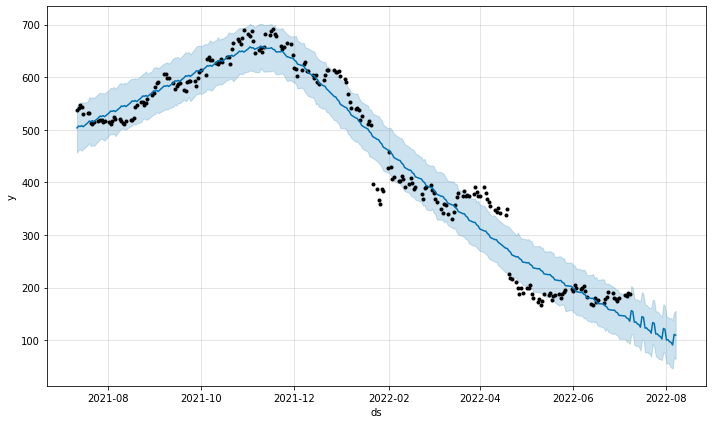

In [57]:
figure = m.plot(forecast, xlabel="ds", ylabel="y")

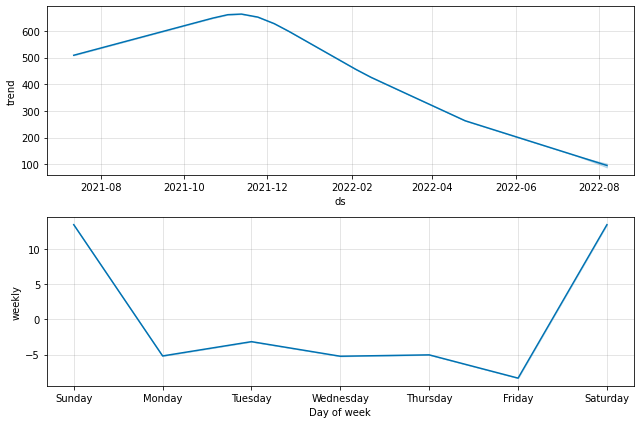

In [58]:
figure2 = m.plot_components(forecast)

In [59]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>